# Weather Data Stats

Load in required packages:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

Read in required files:

In [701]:
siteyear = pd.read_csv("/home/disk/eos8/ach315/upscale/weadata/site_year_crithr3.csv", dtype={"site": "str"})
siteyear = siteyear.drop(siteyear.columns[0], axis=1)

In [702]:
df = pd.read_csv("/home/disk/eos8/ach315/upscale/weadata/weadata.csv", dtype={"sites": "str"})
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15531072 entries, 0 to 15531071
Data columns (total 6 columns):
date      datetime64[ns]
sites     object
temp      float64
precip    float64
rh        float64
solrad    float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 711.0+ MB


In [703]:
print(df.shape)
df.head()

(15531072, 6)


,date,sites,temp,precip,rh,solrad
0,1964-05-01 00:00:00,03103,9.4,0.0,0.605071,0.0
1,1964-05-01 01:00:00,03103,5.6,15.0,0.850413,0.0
2,1964-05-01 02:00:00,03103,4.4,0.0,0.925122,0.0
3,1964-05-01 03:00:00,03103,3.3,0.0,0.924547,0.0
4,1964-05-01 04:00:00,03103,2.8,0.0,0.924283,0.0


### Quick look at raw weather data:

(array([2.000000e+00, 3.400000e+01, 4.990000e+02, 4.725000e+03,
        1.407490e+05, 1.706460e+06, 4.693256e+06, 5.769421e+06,
        9.851060e+05, 1.049000e+04]),
 array([-48.2 , -38.38, -28.56, -18.74,  -8.92,   0.9 ,  10.72,  20.54,
         30.36,  40.18,  50.  ]),
 <a list of 10 Patch objects>)

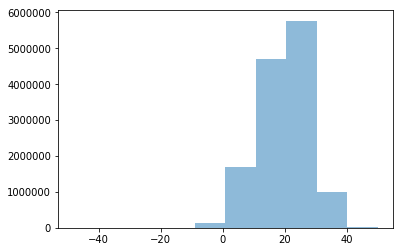

In [642]:
temp = df.temp[~df.temp.isnull()] # need to get rid of nan before can plot histogram
plt.hist(temp, alpha=0.5)

(array([  59740.,  340356.,  625407.,  982752., 1354180., 1660220.,
        1829874., 2075960., 2476928., 1806720.]),
 array([0.01025103, 0.10922592, 0.20820082, 0.30717572, 0.40615062,
        0.50512551, 0.60410041, 0.70307531, 0.80205021, 0.9010251 ,
        1.        ]),
 <a list of 10 Patch objects>)

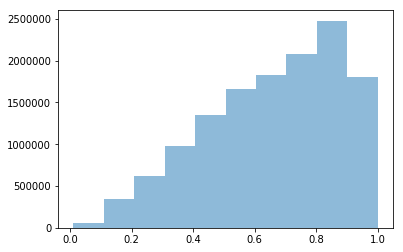

In [670]:
rh = df.rh[(~df.rh.isnull())]
plt.hist(rh, alpha=0.5)

(array([3.36954e+05, 1.30287e+05, 5.92660e+04, 3.39320e+04, 2.00710e+04,
        1.48690e+04, 1.01460e+04, 7.59000e+03, 5.82800e+03, 4.08000e+03,
        3.80100e+03, 2.89000e+03, 2.12000e+03, 1.99800e+03, 1.90900e+03,
        1.58300e+03, 1.35000e+03, 1.19100e+03, 9.62000e+02, 9.28000e+02,
        7.63000e+02, 6.61000e+02, 6.12000e+02, 4.87000e+02, 4.41000e+02,
        4.39000e+02, 3.64000e+02, 2.96000e+02, 2.01000e+02, 2.59000e+02,
        2.43000e+02, 2.18000e+02, 1.52000e+02, 1.91000e+02, 1.49000e+02,
        1.32000e+02, 1.25000e+02, 8.40000e+01, 1.01000e+02, 8.80000e+01,
        6.50000e+01, 5.80000e+01, 4.70000e+01, 4.30000e+01, 4.00000e+01,
        5.80000e+01, 4.40000e+01, 3.10000e+01, 3.20000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]

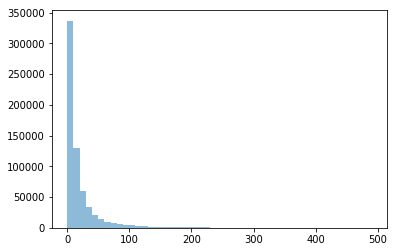

In [669]:
test = [x for x in precip if x != int(0)]
plt.hist(test, bins=[i for i in range(0,500,10)], alpha=0.5)

### Analyzing general growing season stats

In [693]:
df.head()

,date,sites,temp,precip,rh,solrad
0,1964-05-01 00:00:00,03103,9.4,0.0,0.605071,0.0
1,1964-05-01 01:00:00,03103,5.6,15.0,0.850413,0.0
2,1964-05-01 02:00:00,03103,4.4,0.0,0.925122,0.0
3,1964-05-01 03:00:00,03103,3.3,0.0,0.924547,0.0
4,1964-05-01 04:00:00,03103,2.8,0.0,0.924283,0.0


In [692]:
valid_siteyears = siteyear.shape[0]
siteyear.head()

,site,year
0,03103,1964
1,03103,1966
2,03103,1967
3,03103,1969
4,03103,1970


In [ ]:
btemp = 8
temp_mean = list()
gdh = list()
rh_mean = list()
precip_sum = list()

for i in range(valid_siteyears):
    dfi = df[df.date.dt.year == siteyear.year[i]] 
    dfi = dfi[dfi.sites == siteyear.site[i]]

    tempi_mean = np.mean(dfi.temp) # mean growing season temp
    temp_mean.append(tempi_mean)

    temps = [x for x in dfi.temp if x >= 8] # growing season growing degree hours
    gdhi = np.sum([x - btemp for x in temps])
    gdh.append(gdhi)

    rhi_mean = np.mean(dfi.rh) # mean growing season rh
    rh_mean.append(rhi_mean)

    precipi_sum = np.sum(dfi.precip) # total growing season precip
    precip_sum.append(precipi_sum)
    
#    print(i)

In [731]:
siteyear.head()

,site,year
0,03103,1964
1,03103,1966
2,03103,1967
3,03103,1969
4,03103,1970


In [739]:
df_season = pd.DataFrame({"year": siteyear.year, "site": siteyear.site, 
                          "temp_mean": temp_mean, "gdh": gdh, "rh_mean": rh_mean, "precip_sum": precip_sum},
                         columns=["year", "site", "temp_mean", "gdh", "rh_mean", "precip_sum"])

In [762]:
df_season.to_csv("/home/disk/eos8/ach315/upscale/weadata/weadata_season.csv")

In [740]:
df_season.head()

,year,site,temp_mean,gdh,rh_mean,precip_sum
0,1964,03103,14.280639,31830.2,0.485070,2207.0
1,1966,03103,14.703397,10996.6,0.521153,843.0
2,1967,03103,13.812092,9869.4,0.538665,1164.0
3,1969,03103,13.825272,10329.3,0.469296,510.0
4,1970,03103,14.284375,10829.1,0.467291,885.0


Text(0.5,0,'mean growing season temperature')

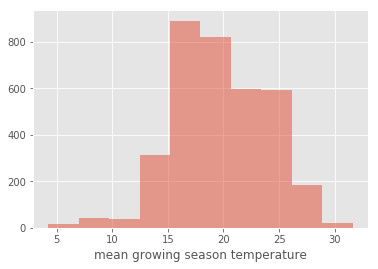

In [759]:
plt.hist(df_season.temp_mean, alpha=0.5)
plt.xlabel("mean growing season temperature")

Text(0.5,0,'growing season precipitatoin')

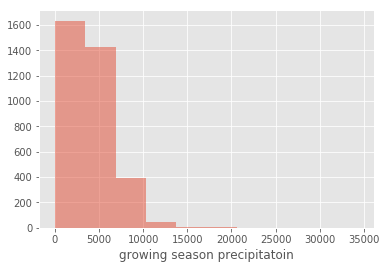

In [760]:
plt.hist(df_season.precip_sum, alpha=0.5)
plt.xlabel("growing season precipitatoin")

Text(0.5,0,'growing degree hours over season')

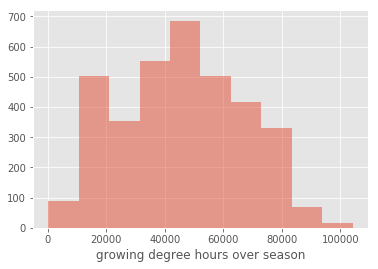

In [758]:
plt.hist(df_season.gdh, alpha=0.5)
plt.xlabel("growing degree hours over season")

Text(0.5,0,'mean growing season relative humidity')

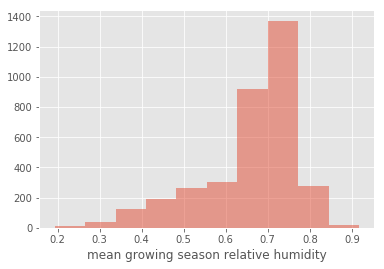

In [757]:
plt.hist(df_season.rh_mean, alpha=0.5)
plt.xlabel("mean growing season relative humidity")